In [2]:
import pystan
import arviz

# this code is implemtetion of idea about inference of private data (found the idea on the web)

the expirment talks about how to make a discrete surevy to infere the number of cheaters, it goes as -> 
1) toss a coin
1.1) if it's head - answer the truth
1.2) if it's tail - toss the coin again and anwer the result of the coin

in this way if your answer was true, there no way know if it's from the random coin flip , or the actual private information.
one that see all the answers can dudce the correct number , because he knows how a coin flip should act.

In [76]:
model = """

data {
    int<lower=0> N; // number of people answered the survey
    int<lower=0, upper = 1> y[N]; // boolean array of answers
}

parameters {
    real<lower=0, upper=1> theta; // the latent variable we want to infer
    real<lower=0, upper=1> coin_results[N]; // helper coin results buffer
}


model {
    theta ~ beta(0.5, 0.5); // beta prior
    for (i in 1:N){
        coin_results[i] ~ normal(0 , 1);
        if (coin_results[i] >= 0){
            y[i] ~ bernoulli(theta);
        }
        else{
            y[i] ~ bernoulli(0.5);
        }
    }
    
}
"""

In [77]:
results = [0 , 1 ,1, 1, 1 ,0, 0, 0 , 0 , 0, 0,0 ]

exp_data = {
    'N': len(results),
    'y': results
}

In [78]:
sm = pystan.StanModel(model_code=model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_253b7b21ad7780ba0df8d0570d3407f2 NOW.


In [79]:
fit = sm.sampling(data=exp_data, iter=1000, chains=4, control = {"adapt_delta" : 0.9})

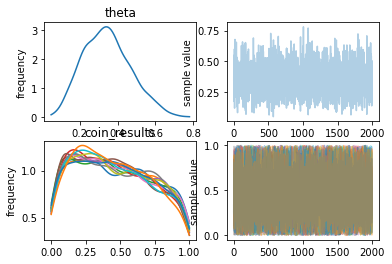

In [80]:
plt = fit.plot()

In [81]:
print(fit)

Inference for Stan model: anon_model_253b7b21ad7780ba0df8d0570d3407f2.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

                   mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta              0.34  2.2e-3   0.13   0.13   0.25   0.34   0.43   0.61   3116    1.0
coin_results[1]    0.47  5.4e-3   0.29   0.02   0.22   0.46    0.7   0.97   2852    1.0
coin_results[2]    0.46  5.2e-3   0.28   0.02   0.23   0.45    0.7   0.96   2894    1.0
coin_results[3]    0.46  5.9e-3   0.29   0.02   0.21   0.44    0.7   0.97   2350    1.0
coin_results[4]    0.45  6.0e-3   0.28   0.02   0.21   0.43   0.69   0.97   2146    1.0
coin_results[5]    0.46  5.7e-3   0.28   0.02   0.22   0.45   0.69   0.96   2388    1.0
coin_results[6]    0.45  5.0e-3   0.28   0.03   0.21   0.43   0.66   0.95   3034    1.0
coin_results[7]    0.46  5.7e-3   0.29   0.02   0.22   0.45    0.7   0.97   2518    1.0
coin_results[8]    0.